# Simple Implementation of [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset


In [366]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime 
import os


dataLen = 150

# Create a Sirectory to save weithgs and an plots [resource](https://stackoverflow.com/questions/1274405/how-to-create-new-folder)

In [367]:
def creatDirectory(path, addings):
    '''
    creates a new directory to save figures and scores with input params a dictionary
    addings: str which adds name in front of the datatime name
    '''
    direc = f"{datetime.datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}_{addings}/"
    if not os.path.exists(path + direc):
        os.makedirs(path + direc)

    return path + direc



In [368]:
def saveParams(path,textFileName, params):
    #saves params in a text file
    fileName = f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_{textFileName}.txt"
    f = open(path+fileName, "w")
    
    for key in params.keys(): 
        f.write(f"{key}={params[key]}\n")
    f.close()
    
def saveWeights(path,fileName, weights):
    name = f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_{fileName}.npz"
    for x in weights:
        np.save(path+name, x)

# test
# epochs = 100
# lr = .3
# params = {'epochs': epochs, 'lr': lr}
# newDirec = creatDirectory(f"./train-dryBean/", params)
# saveParams(newDirec, params)
# saveWeights(newDirec,weights, params)

# Loading Data

In [369]:
def loadData(fileName, dataLen):
    """
    loads a file.data into a numpy array
    filename: string
    dataLen: int
    
    return: 
    dataSetInput: n x n numpy ndarray every row represents a stream of input
    dataSetClass: n x 1 numpy ndarray

    """



    file = open(fileName, 'rb')
    data = [row.decode('utf-8').split(',') for row in file]
    file.close()

    data= data[:dataLen]

    #data input ---> x
    data_in = [row[:-1] for row in data]
    dataSetInput = np.array(data_in, dtype=float)

    #data classes ---> groud truth
    data_class = [row[-1][:-1] for row in data]
    dataSetClass = np.array(data_class)
    
    return dataSetInput, dataSetClass



dataSetInput,dataSetClass = loadData('iris-data/iris.data', dataLen)


# Normalize the data

mean:  [5.84333333 3.054      3.75866667 1.19866667]
std:  [0.82530129 0.43214658 1.75852918 0.76061262]


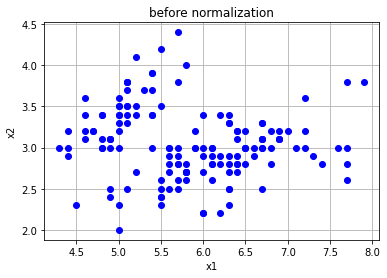

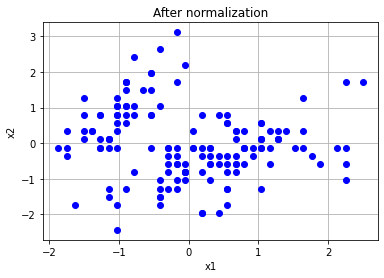

In [370]:
def normalizeData(dataSetInput, plot=False):
    """
    subtracting mean and dviding by the std
    
     dataSetInput: n x n numpy ndarray every row represents a stream of input
     plot: bolean weather to show plot or not

    """

    mean = np.mean(dataSetInput, axis=0)
    std = np.std(dataSetInput, axis=0)
    print ('mean: ', mean)
    print ('std: ', std)


    if plot: 
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("before normalization")
        plt.show()

    # normalizing the data
    dataSetInput -= mean
    dataSetInput /= std
    
    if plot:
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("After normalization")
        plt.show()

# test 
# x = np.array([[1., 2], [3, 4], [5, 6], [7, 8]])
# normalizeData(x, True)
# print(x)

normalizeData(dataSetInput, True) #our data is normalized

# generating true ouput

In [371]:
def generateOuput(class_l, dataSetClass):
    '''
    converts class names into vecor
    example: "classX" => [1, 0, 0, 0]
    class_l: list of strings of the name of the classes
    dataSetClass: numpy column vector of strings
    
    returns: a numpy matrix len(dataSetClas) x len(class_l)
    '''
    
    class_d = {}
    dataSetOutput = np.zeros((dataSetClass.shape[0], len(class_l)))
    
    for i in range(len(class_l)):
        class_d[class_l[i]] = i
        
    
    for i in range(len(dataSetClass)):
        c = dataSetClass[i]
        true_i = class_d[c]
        dataSetOutput[i][true_i] =1

    return dataSetOutput
    
dataSetOutput =generateOuput(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], dataSetClass)
    

# Adding Bias

In [372]:
dataSetInput = np.append(dataSetInput, np.transpose([ np.ones(dataSetInput.shape[0]) ]), axis=1)
# testing 
# l = [[1, 2], [3, 4]]
# l = np.array(l)
# one = np.ones(l.shape[0])
# out = np.append(l, np.transpose([one]), axis=1)
# print(out)

# Split in train and test

In [373]:
# split into train and test
rand = np.random.rand(150) 

#inputs
dataSetTestInput = dataSetInput[rand > .5]
dataSetInput = dataSetInput[rand <= .5]

#output
dataSetTestOutput = dataSetOutput[rand > .5]
dataSetOutput = dataSetOutput[rand <= .5]

print(dataSetTestInput.shape)
print(dataSetInput.shape)

print(dataSetTestOutput.shape)
print(dataSetOutput.shape)




(74, 5)
(76, 5)
(74, 3)
(76, 3)


# Activation Functions

In [374]:
#activation function 
act = {'leakRelu': lambda x:np.maximum(.001*x, x),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x:np.transpose(np.exp(x).T/np.sum(np.exp(x), axis=1))}


def leekRelyDrevative(x, leak):
    if len(x.shape) != 1:
        x_vec = x.reshape(x.shape[0]*x.shape[1])
    else:
        x_vec = x

    y = []
    for i in range(len(x_vec)):
        if x_vec[i] >0:
            y.append(1)
            
        elif x_vec[i]<0:
            y.append(leak)
            
        else:
            y.append(0)

    y = np.array(y)
    return y.reshape(x.shape)


actDrevative = {'leakRelu':lambda x: leekRelyDrevative(x, .001),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x: act['sigmoid'](x)*(1-act['sigmoid'](x))}

# Test
# x = np.array([1, 2, 3, 4, -10])
# y = actDrevative['leakRelu'](x)
# print(x)
# print(y)


# Defining  hidden layers

W.shape= (5, 10)


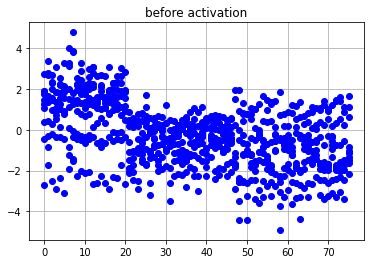

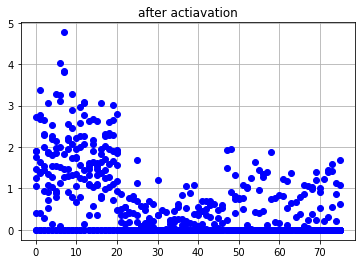

W.shape= (10, 3)


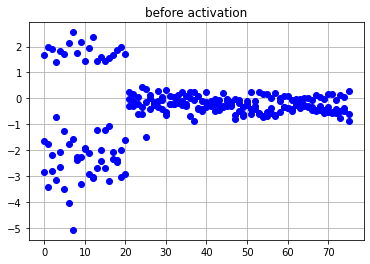

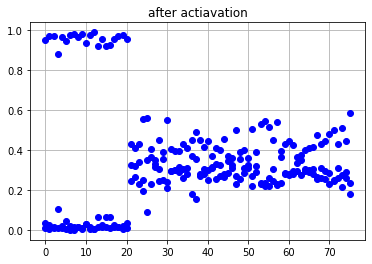

In [375]:
#init weights 
hiddenLayerSizes = [10, 3]
nonlinearities = ['leakRelu']*(len(hiddenLayerSizes)-1) + ['sigmoid']
weights = []



#forward path
Hsaved = {}
for i in range (len(hiddenLayerSizes)): 
    X = dataSetInput if i==0 else Hsaved[i-1] 
    fan_in = X.shape[1] 
    fan_out = hiddenLayerSizes[i] #selecting the size of the hidden layer 
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) 
    weights.append(W)  #saving weights
    print ("W.shape=", W.shape)
    
    H = np.matmul(X, W) #matrix multplixation
   
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("before activation")
    plt.show()

    H = act[nonlinearities[i]](H)  #applying activation function 
    
    
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("after actiavation")
    plt.show()
    
    Hsaved[i] = H # saveing resluts to use it to the next loop



# loss function [cross Entropy](https://gist.github.com/Atlas7/22372a4f6b0846cfc3797766d7b529e8)

In [376]:
# loass function 
def my_log(x):
    y = np.zeros(x.shape)
    
    if len(x.shape) == 1:
        for i in range(x.shape[0]):
            if x[i] != 0:
                y[i] = np.log(x[i])
    else:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if x[i][j] != 0:
                    y[i][j] = np.log(x[i][j])
    return y

#test
# print(my_log(np.array([3, 4, 0])))


def crossEntropyLoss(trueY, predictY):
                    
    loss=-(1.0/trueY.shape[0])* np.sum(trueY*my_log(predictY) + (1-trueY)*my_log(1-predictY))
    
    return loss
#test
# print(crossEntropyLoss(dataSetOutput[:2], np.array([[1, 0, 0], [.3, .4, 0]])))


#loss dervative
def crossEntropyLossDrvative(trueY, predictY):
    d= -(1.0/trueY.shape[0])* (trueY/predictY - (1-trueY)/(1-predictY))
    return d

# test
# print("test loss dervative:", crossEntropyLossDrvative(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[.2, .7, 0.1], [.3, .4, .3]])) )   

# Forward Path

In [377]:
#forward path
def forward(dataInput, plot=False, debug=False):
    outputFlow_list = []
    outputFlow_list.append(dataInput)
    
    for i in range (len(hiddenLayerSizes)): 
        X = outputFlow_list[-1] 
        W = weights[i]
        
        H = np.matmul(X, W) #matrix multplixation
        if debug:
            print("X: ", X.shape, ", W:", W.shape, " =H.shape=", H.shape)
        outputFlow_list.append(H)

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("before activation")
            plt.show()

        H = act[nonlinearities[i]](H)  #applying activation function 
        if debug:
            print("after activation H: ",H.shape)
        outputFlow_list.append(H) # saveing resluts to use it to the next loop

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("after actiavation")
            plt.show()

        
    
    return outputFlow_list

# test loop
# outputFlow_list = forward(dataSetInput)
# for i in range(len(outputFlow_list)): 
#     print("flow[", i, ']=', outputFlow_list[i][:1])
#     print("flow[", i, ']=', outputFlow_list[i].shape)

# BackPropagation

In [378]:
# back brobagation
def backpropagationDetailed(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    y_hat = outputFlow_list[-1] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative = ",drev.shape, drev[:1] )
        print()
    
    #2- sigmoid
    yBeforeSig  = outputFlow_list[-2]
    sigmoidDrev = actDrevative['sigmoid'](yBeforeSig) # 150 x 3
    drev = drev * sigmoidDrev
    if debug:
        print("2- dervative = ",drev.shape, drev[:1] )
        print("y-sigmoidDrev-inupt=", yBeforeSig[:1])
        print("y-sigmoidDrev-output=", sigmoidDrev[:1])
        print()


    
    # 3- hidden layer (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-3]), drev) # (10 x 150) (150 x 3) = (10 x 3)
    weights[-1] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
    
    drev = np.matmul(drev, np.transpose(weights[-1])) # (150 x 3) (3 x 10) = (150 x 10)
    if debug:
        print("3- dervative = ",drev.shape, drev[:1] )
        print()

    
    #4- reulu
    reluDev = actDrevative['leakRelu'](outputFlow_list[-4])  # 150 x 10
#     reluDev = np.random.rand(150, 10)
    drev = drev * reluDev # elemet wise product
    if debug:
        print("reludev input=", outputFlow_list[-4][:1])
        print("reludev output", reluDev[:1])
        print("4- drevative = ",drev.shape, drev[:1] )
        print()

    
    #4- layer 1 output (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-5]), drev) # x(5 x 150) (150 x 10) = (5 x 10)
    weights[-2] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
        
    drev = np.matmul(drev, np.transpose(weights[-2])) # (150 x 10) (10 x 4) = (150 x 4)
                                                      # for the bias and gradient of the input
    if debug:
        print("5- dervative = ",drev.shape, drev[:1] )

    
    
    

# Generic backpropagation

In [379]:
# back brobagation
def backpropagationGeneric(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    backIndex = -1
    y_hat = outputFlow_list[backIndex] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative (loss) = ",drev.shape, drev[:1] )
        print()
    
    # looping over all hidden layers
    for i in range(len(hiddenLayerSizes)-1, -1, -1):
        # 1- activation
        backIndex -= 1
        beforeActivaion  = outputFlow_list[backIndex]
        activationDrev = actDrevative[nonlinearities[i]](beforeActivaion) # 150 x 3
        drev = drev * activationDrev
        if debug:
            print("1- dervative = ",drev.shape, drev[:1] )
            print("y-before-activation=", beforeActivaion[:1])
            print("y-activation-dervative=", activationDrev[:1])
            print()     
        
        # 2- grad
        backIndex -= 1
        X = outputFlow_list[backIndex]
        grad_step = np.matmul(np.transpose(X), drev) # (10 x 150) (150 x 3) = (10 x 3)
        weights[i] -= lr * grad_step
        if debug:
            print("2- grad-step= ",grad_step.shape, grad_step[:1])

        
        # 3 drev throw the path
        drev = np.matmul(drev, np.transpose(weights[i])) # (150 x 3) (3 x 10) = (150 x 10)
        if debug:
            print("3- dervative = ",drev.shape, drev[:1] )
            print()

    
    


# Testing 

In [380]:
# evaluating test

def test(trueY, predictY, dataSetClass=1):
    """
    performing test and returns the accuracy of the data
    TODO return class names
    """
    predictIndex = np.argmax(predictY, axis=1) #along rows

    truePredicts =0
    counter =0
    for i in predictIndex:
        if trueY[counter][i] == 1:
            truePredicts +=1
        counter +=1
    return truePredicts/trueY.shape[0]



# Train

In [381]:
lossL = []
scoreL = []
def train(epochs, lr):
   
    for i in range(epochs):
        #forward
        outputFlow_list = forward(dataSetInput)

        #loss calculations
        loss = crossEntropyLoss(dataSetOutput, outputFlow_list[-1])
        lossL.append(loss)
        
        
        #backpropagation
#         backpropagationDetailed(lr, outputFlow_list, debug=False)
        backpropagationGeneric(lr, outputFlow_list, debug=False)

        
        # TESTING
        #forward
        outputFlow_list = forward(dataSetTestInput)
        #evaluationg score
        score = test(dataSetTestOutput, outputFlow_list[-1])
        scoreL.append(score)
    

        
        print("Epoch: ",i, ", Loss=", loss, ", Score=", score )
        

# annotate plot

In [382]:
def annotatePlot(plotLrL, resultL):
    for i in range(len(plotLrL)):
        x = epochs * (i+1) -1
        y = resultL[x]
        plt.annotate(f"{plotLrL[i]}", # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

In [383]:
avgScoreL = []
topScoreL = []
minLossL = []
plotLrL = []


epochs = 100
lrL = [.4, .2] + 3*[.1] + 6 * [.05] 
epochsL = [i for i in range(epochs, (len(lrL)+1)*epochs, epochs)]

# create new dirctoy to save our training
trainDir = creatDirectory("./train-iris/", f"total_epochs={epochs * len(lrL)}")

Epoch:  0 , Loss= 3.60945498957039 , Score= 0.7162162162162162
Epoch:  1 , Loss= 1.376359477776195 , Score= 0.8243243243243243
Epoch:  2 , Loss= 1.180388518377425 , Score= 0.8378378378378378
Epoch:  3 , Loss= 1.061081271650208 , Score= 0.8513513513513513
Epoch:  4 , Loss= 0.9764047281644955 , Score= 0.8513513513513513
Epoch:  5 , Loss= 0.9178070931317001 , Score= 0.8513513513513513
Epoch:  6 , Loss= 0.8770551190516915 , Score= 0.8513513513513513
Epoch:  7 , Loss= 0.8469267599461627 , Score= 0.8378378378378378
Epoch:  8 , Loss= 0.822564324444955 , Score= 0.8378378378378378
Epoch:  9 , Loss= 0.8022508399676319 , Score= 0.8378378378378378
Epoch:  10 , Loss= 0.7842662910996404 , Score= 0.8378378378378378
Epoch:  11 , Loss= 0.767304271608045 , Score= 0.8378378378378378
Epoch:  12 , Loss= 0.751322369807468 , Score= 0.8378378378378378
Epoch:  13 , Loss= 0.7368282438579422 , Score= 0.8513513513513513
Epoch:  14 , Loss= 0.723749771814115 , Score= 0.8513513513513513
Epoch:  15 , Loss= 0.71219136

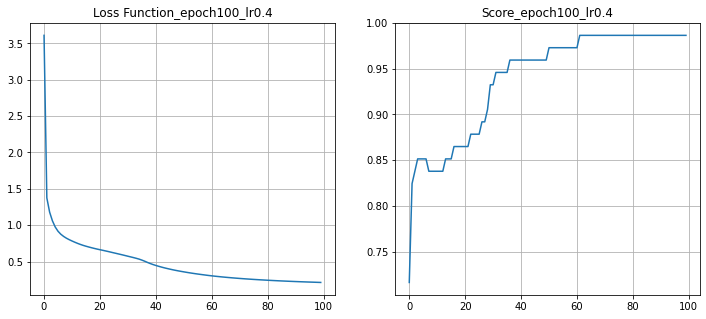

Epoch:  0 , Loss= 0.21312515961712963 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.2125177113688701 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.21191858797672883 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.21132762675536712 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.2107446688921994 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.21016919422252797 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.20959829697405466 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.20903502834026874 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.2084792421559298 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.2079307955510503 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.20738954892202818 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.20685536588219813 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.20632811319868974 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.20580766072131215 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.20529388130749862 , Score= 0.9864864864864865
Epoch:  1

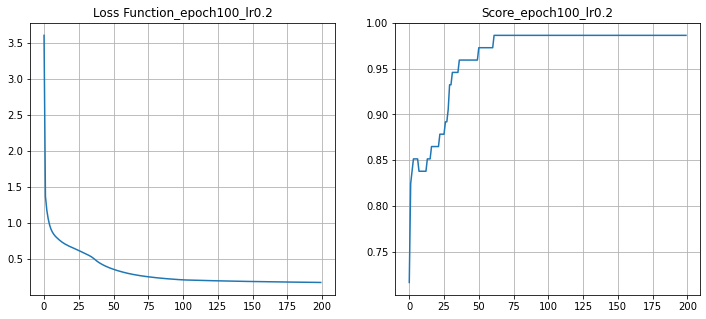

Epoch:  0 , Loss= 0.17747904344268672 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.17737478119589845 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.17727093586212353 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.17716750490387426 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.177064485805245 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.17696187607160402 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.1768596732293067 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.17675787482542538 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.17665647842749346 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.1765554816232616 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.17645488202046272 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.17635467724658607 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.17625486494865844 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.1761554427930305 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.1760564084651694 , Score= 0.9864864864864865
Epoch:  15 

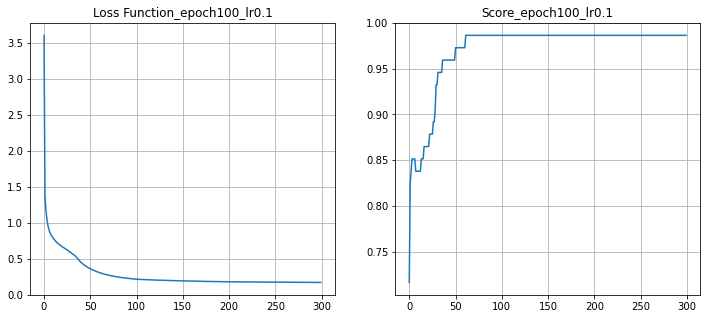

Epoch:  0 , Loss= 0.16882725614990576 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.16876773294013145 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.16870843174771025 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.16864934598484546 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.16859047080326986 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.1685318025035406 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.1684733381509065 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.168415075324777 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.16835701195473352 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.16829914621270156 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.1682414764416495 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.16818400110811 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.16812671877028865 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.16806962805641512 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.16801272764985742 , Score= 0.9864864864864865
Epoch:  15 , 

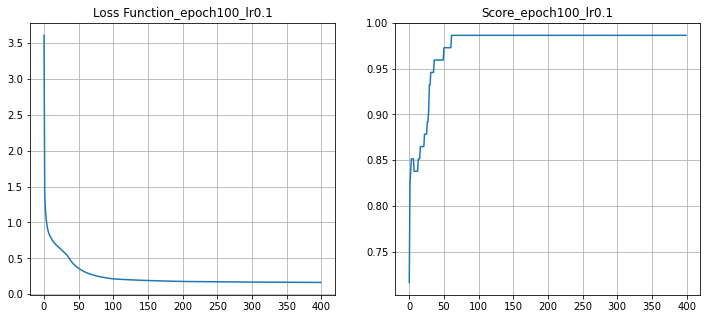

Epoch:  0 , Loss= 0.16372784019622208 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.1636841330878072 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.16364054782421264 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.16359707947581512 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.16355373220511515 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.16351050548626914 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.16346739879628713 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.16342441161508164 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.1633815434255027 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.16333879371336182 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.16329616196744734 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.16325364767953143 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.1632112503443714 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.1631689694597055 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.1631268045262452 , Score= 0.9864864864864865
Epoch:  15

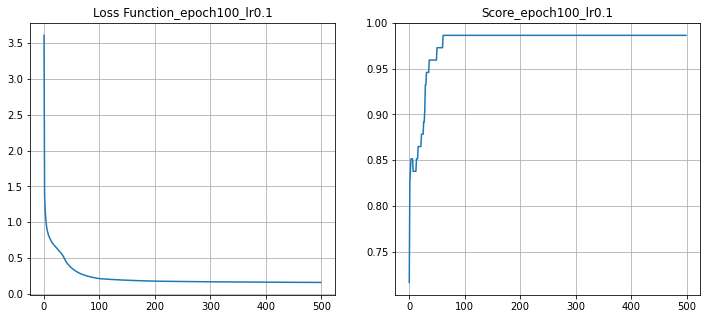

Epoch:  0 , Loss= 0.15988757525493663 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.15987074020802178 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.15985392551434863 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.15983713113595352 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.15982035703497266 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.15980360317364187 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.15978686951429566 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.1597701560193669 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.1597534626513865 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.15973678937298277 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.159720136146881 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.15970350293590316 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.1596868897029673 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.15967029641108707 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.15965372302337205 , Score= 0.9864864864864865
Epoch:  15

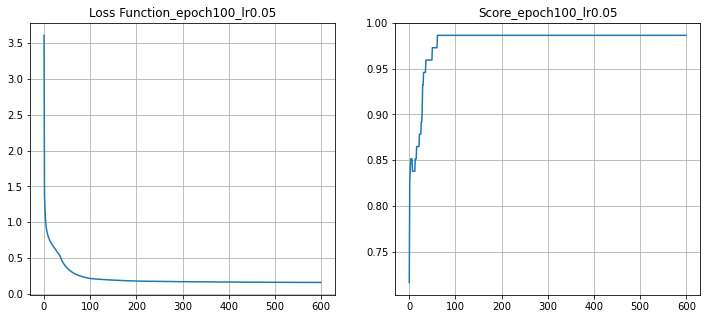

Epoch:  0 , Loss= 0.15829904348048188 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.15828407055516377 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.15826911462483756 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.1582541756599188 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.15823925363089336 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.15822434850831818 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.1582094602628205 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.1581945888650975 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.15817973428591645 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.1581648964961146 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.1581500754665984 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.15813527116834364 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.15812048357239525 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.15810571264986706 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.1580909583719417 , Score= 0.9864864864864865
Epoch:  15 

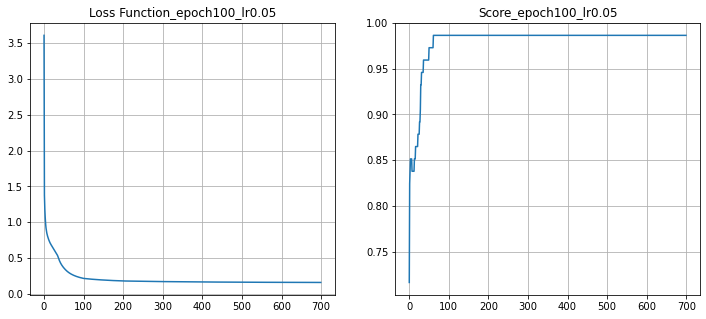

Epoch:  0 , Loss= 0.15688135445849627 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.1568679452389489 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.156854550374043 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.15684116984031207 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.1568278036143419 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.15681445167277072 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.15680111399228905 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.15678779054963915 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.15677448132161542 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.15676118628506375 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.15674790541688197 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.15673463869401894 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.1567213860934751 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.15670814759230187 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.1566949231676017 , Score= 0.9864864864864865
Epoch:  15 

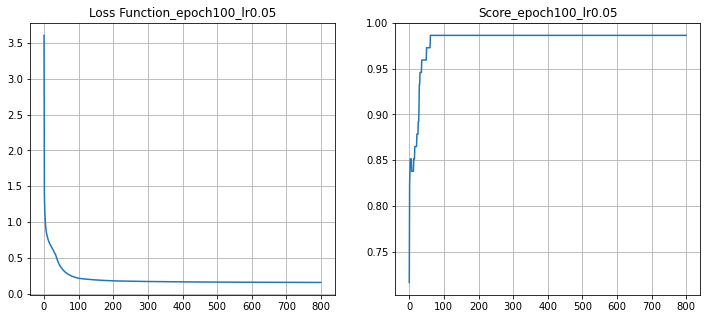

Epoch:  0 , Loss= 0.15560855132656015 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.15559648453916558 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.1555844299781533 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.15557238762467443 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.15556035745991956 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.1555483394651186 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.15553633362154085 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.15552433991049497 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.15551235831332863 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.15550038881142839 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.15548843138622 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.1554764860191679 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.15546455269177517 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.15545263138558352 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.15544072208217305 , Score= 0.9864864864864865
Epoch:  15 

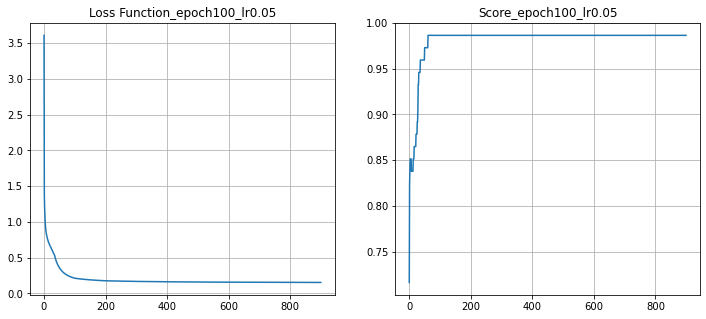

Epoch:  0 , Loss= 0.15445949272604023 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.15444856127509268 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.15443764034538915 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.15442672992155831 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.15441582998825912 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.15440494053018108 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.15439406153204366 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.15438319297859668 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.15437233485461999 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.15436148714492348 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.15435064983434693 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.15433982290776016 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.1543290063500625 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.15431820014618322 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.15430740428108122 , Score= 0.9864864864864865
Epoch:

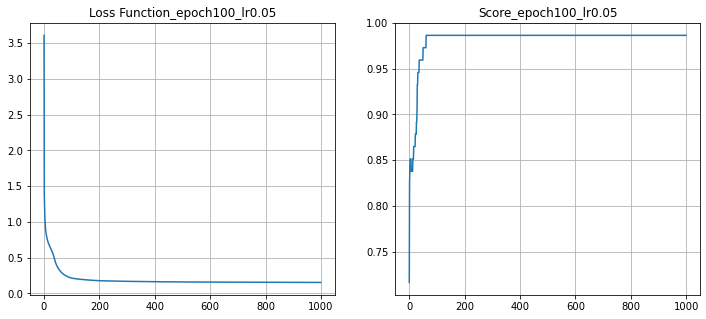

Epoch:  0 , Loss= 0.15341605321426385 , Score= 0.9864864864864865
Epoch:  1 , Loss= 0.15340608905961334 , Score= 0.9864864864864865
Epoch:  2 , Loss= 0.15339613403789315 , Score= 0.9864864864864865
Epoch:  3 , Loss= 0.1533861881363665 , Score= 0.9864864864864865
Epoch:  4 , Loss= 0.15337625134232477 , Score= 0.9864864864864865
Epoch:  5 , Loss= 0.15336632364308656 , Score= 0.9864864864864865
Epoch:  6 , Loss= 0.1533564050259977 , Score= 0.9864864864864865
Epoch:  7 , Loss= 0.15334649547843074 , Score= 0.9864864864864865
Epoch:  8 , Loss= 0.15333659498778424 , Score= 0.9864864864864865
Epoch:  9 , Loss= 0.1533267035414827 , Score= 0.9864864864864865
Epoch:  10 , Loss= 0.15331682112697645 , Score= 0.9864864864864865
Epoch:  11 , Loss= 0.15330694773174083 , Score= 0.9864864864864865
Epoch:  12 , Loss= 0.15329708334327638 , Score= 0.9864864864864865
Epoch:  13 , Loss= 0.15328722794910835 , Score= 0.9864864864864865
Epoch:  14 , Loss= 0.15327738153678658 , Score= 0.9864864864864865
Epoch:  

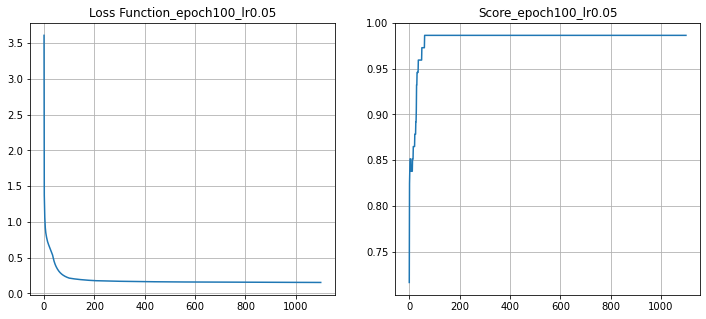

In [384]:


for i in lrL:
    lr = i
    
    # acual traing
    train(epochs, lr)
    
    
    topScoreL.append(np.round(np.max(scoreL), 5))
    avgScoreL.append(np.round(np.average(scoreL), 5))
    minLossL.append(np.round(lossL[-1], 5))
    print("max-score=", topScoreL[-1])
    print("avg-score=", avgScoreL[-1])
    print("last-loss=", lossL[-1])
    
    # Saving Results
    params = {'epochs': epochs, 'lr': lr, 
             'max-score': np.max(scoreL), "avg-score=": np.average(scoreL), 
              "last-loss=":  lossL[-1]
             }
    newDirec = creatDirectory(trainDir, f"lr={lr}_epochs={epochs}")
    saveParams(newDirec, f"lr={lr}_epochs={epochs}", params)
    saveWeights(newDirec, f"lr={lr}_epochs={epochs}", weights)

    fig = plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.plot(lossL)
    plt.grid(True)
    plt.title(f"Loss Function_epoch{epochs}_lr{lr}")
    # plt.show()
    # fig.savefig(newDirec+f'loss_epoch{epochs}_lr{lr}_{ datetime.datetime.now()}.jpg', bbox_inches='tight', dpi=150)

    # fig = plt.figure()
    plt.subplot(122)
    plt.plot(scoreL)
    plt.grid(True)
    plt.title(f"Score_epoch{epochs}_lr{lr}")
    plt.show()
    fig.savefig(newDirec+f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_lr={lr}_epoch={epochs}.jpg", bbox_inches='tight', dpi=150)



# overall performace

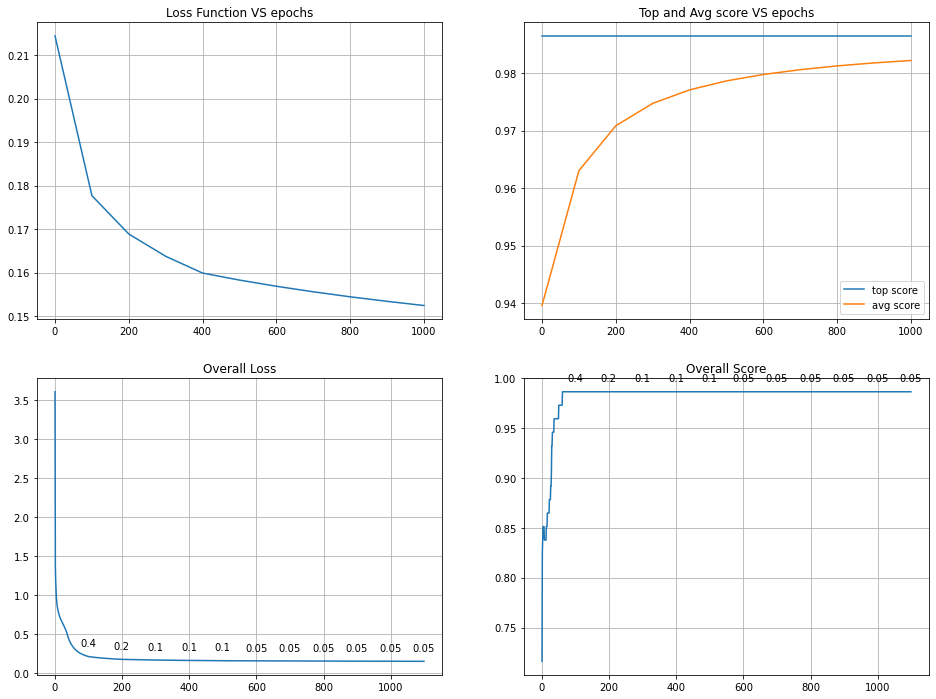

In [385]:
plotLrL += lrL

p = {"learning-rate": str(plotLrL),
     "epochs": epochs,
     "top-Score": str(topScoreL),
     "avg-score": f"{avgScoreL}", 
     "Loss": f"{minLossL}"}
saveParams(trainDir,f"total_epochs={epochs * len(lrL)}", p)


# over all plot
fig = plt.figure(figsize=(16,12))
plt.subplot(221)
plt.plot(np.arange(0, len(minLossL)*epochs, epochs), minLossL)
plt.grid(True)
plt.title(f"Loss Function VS epochs")

plt.subplot(222)
plt.plot(np.arange(0, len(topScoreL)*epochs, epochs), topScoreL, label="top score")
plt.plot(np.arange(0, len(avgScoreL)*epochs, epochs), avgScoreL, label="avg score")
plt.legend()
plt.grid(True)
plt.title(f"Top and Avg score VS epochs")


plt.subplot(223)
plt.plot(lossL)
# plt.legend()
plt.grid(True)
plt.title(f"Overall Loss")
annotatePlot(plotLrL, lossL)


    

plt.subplot(224)
plt.plot(scoreL)
# plt.legend()
plt.grid(True)
plt.title(f"Overall Score")
annotatePlot(plotLrL, scoreL)

    

     
   # saving plot 
plt.show()
fig.savefig(trainDir+f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_total_epochs={epochs * len(lrL)}.jpg", bbox_inches='tight', dpi=150)


